In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf.rnn2/epoch/model.ckpt-27.00-22140'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil.noidf/'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  image_model=image_model)

tensorflow_version: 1.4.1
checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


feature_name attention
image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt start


image_model: <melt.image.image_model.ImageModel object at 0x7fa39307e190>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2.ckpt duration: 19.4581410885
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil.noidf/model.ckpt-3.66-3000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil.noidf/model.ckpt-3.66-3000.map start
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil.noidf/model.ckpt-3.66-3000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v5/mil.noidf/model.ckpt-3.66-3000.map duration: 2.42198085785


In [ ]:
from deepiu.util import idf
from deepiu.util import vocabulary
vocabulary.init('/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt')
vocab = vocabulary.vocab
idf_weights = idf.get_idf()

document_frequency_path /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid/valid_refs_document_frequency.dill
idf 0, 1, 2, 100 0.0 3.39355707979e-07 0.0503116598971 7.53636427776


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 6d36d83e50bfd4739c5e80027bb6e70dea643dd9


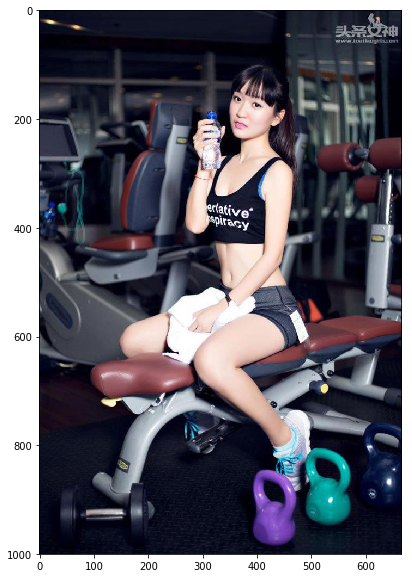

topwords of image:
0 敷脚 3.48464|1 换 3.24794|2 联 2.71797|3 健身房 2.68079|4 休息区 2.58489|5 粉底 2.55808|6 助 2.45643|7 翻包 2.4542|8 奶瓶 2.3953|9 儿童座椅 2.3484|10 跷 2.34365|11 体育器材 2.31537|12 看腿 2.30994|13 烁 2.28317|14 按摩 2.15355|15 演习 2.1445|16 串 2.13828|17 按摩椅 2.11348|18 袜子 2.09306|19 你 2.06525|20 席子 2.06486|21 副驾驶 2.06446|22 乞 2.0635|23 诊脉 2.03741|24 上吊 2.01555|25 借 1.97996|26 运动器材 1.9756|27 有着 1.93387|28 熟睡 1.93195|29 轮椅 1.91434|30 手拿碗 1.8989|31 座椅 1.88942|32 药膏 1.87722|33 撑腰 1.87027|34 抱成一团 1.84999|35 更衣室 1.8468|36 台子上 1.82333|37 噙 1.80699|38 无袖 1.80303|39 健壮 1.79895|40 膝盖 1.79658|41 中年男人 1.7883|42 坐在 1.76856|43 捂 1.76492|44 位上 1.75241|45 鞭子 1.74228|46 直播 1.73054|47 仰卧起坐 1.73027|48 u 1.72616|49 泡泡糖 1.71873|50 脚拿书 1.71669|51 休息 1.70404|52 蹲 1.69041|53 披散 1.68566|54 车厢 1.67066|55 仓 1.65024|56 体 1.64112|57 人头 1.63054|58 擦皮鞋 1.62847|59 长凳 1.61951|60 针线活 1.60667|61 链球 1.60354|62 宿舍 1.58528|63 躺椅 1.57588|64 环抱 1.56408|65 吸氧 1.53984|66 飞行器 1.53654|67 瓶子 1.53627|68 珠宝 1.53047|69 脖子 1.52753|70 衣柜 1.488

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.623 seconds.
Prefix dict has been built succesfully.


瓶子
sim: [ 1.53626788]
idf sim [ 7.84256458]
text(q for exit): 手机
手机
sim: [ 0.9821381]
idf sim [ 3.54256487]
text(q for exit): q
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 2458c92ad595c5b05a35d3fdf0234644f10fe343


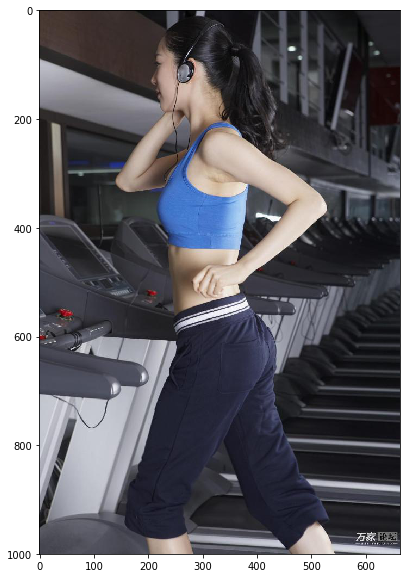

topwords of image:
0 耳机 2.57986|1 珠宝 2.29605|2 衣襟 2.14519|3 牛仔 2.0321|4 擦皮鞋 2.01046|5 耳旁 1.98785|6 柏油路 1.87136|7 腰围 1.84877|8 放脑 1.78866|9 健身房 1.76549|10 牛仔裤 1.74393|11 内衣店 1.73854|12 上车 1.70822|13 汽车 1.70087|14 检测 1.69665|15 熟睡 1.67667|16 荣 1.67109|17 缕 1.6165|18 洗衣机 1.56985|19 握住 1.56962|20 席子 1.56392|21 小刀 1.55097|22 夹克 1.54806|23 镜子 1.54465|24 肚脐 1.52544|25 裤兜 1.52048|26 唇边 1.51641|27 倚靠着 1.50615|28 瓷砖 1.50313|29 翻找 1.49899|30 窄 1.48922|31 残破 1.47649|32 左手 1.45924|33 怪 1.45773|34 车库 1.43276|35 代步 1.42252|36 面前 1.41676|37 吊带裙 1.41202|38 链球 1.40772|39 合在一起 1.39233|40 操作台 1.38073|41 液晶电视 1.37941|42 打伞 1.37011|43 取款机 1.36955|44 脖子 1.36788|45 弓步 1.36627|46 剃 1.36426|47 黑发 1.36401|48 鞋架 1.3631|49 绑带 1.34498|50 小型 1.33786|51 靠着 1.33781|52 局 1.32803|53 体 1.32195|54 陆 1.30991|55 电子设备 1.30684|56 打雪仗 1.30607|57 链 1.28616|58 一间 1.28317|59 手机 1.27982|60 旁半 1.27913|61 滑雪服 1.27708|62 右臂 1.276|63 背心 1.27126|64 照相机 1.26848|65 脑后 1.2552|66 大腿 1.25455|67 炮 1.25415|68 背着 1.25011|69 净 1.24895|70 冰淇淋 1.

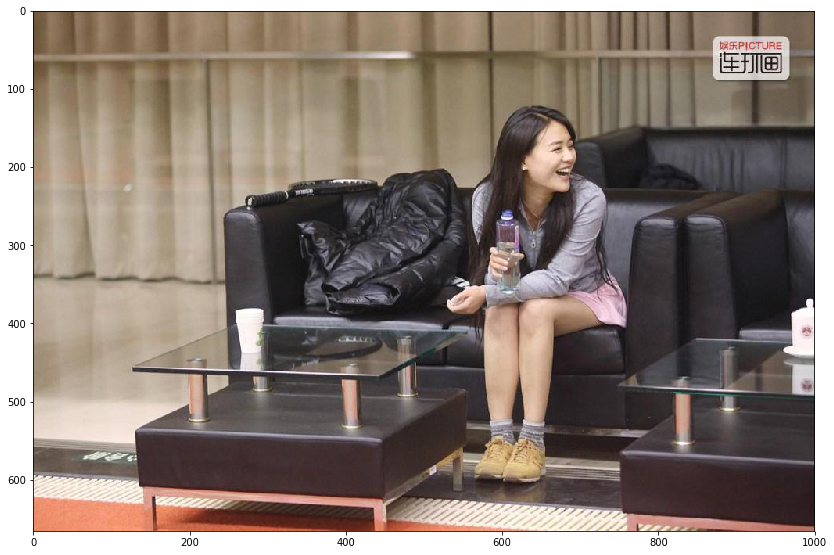

topwords of image:
0 剃着 3.06711|1 人涂 2.99134|2 观众席 2.725|3 直播 2.56746|4 沙发 2.45749|5 弹琴 2.15687|6 诊脉 1.95248|7 二郎腿 1.88794|8 术 1.88214|9 木 1.83873|10 容 1.79938|11 沙发椅 1.75706|12 广播室 1.72313|13 搞 1.68164|14 凳子 1.66794|15 献 1.66196|16 口琴 1.64824|17 大步 1.59806|18 长凳 1.59736|19 按摩 1.57347|20 满头白发 1.57285|21 上侧 1.55972|22 棕 1.5466|23 板凳 1.49742|24 中山装 1.48895|25 教室 1.48627|26 椅 1.47512|27 联 1.47272|28 讲话 1.44645|29 儿童座椅 1.42951|30 下腰 1.41493|31 油桶 1.41366|32 举行 1.40092|33 粉底 1.39336|34 说话 1.38787|35 椅子 1.38787|36 主讲 1.38676|37 彩灯 1.38414|38 裤 1.38115|39 老爷爷 1.37842|40 家具 1.37767|41 跷跷板 1.36807|42 会议厅 1.3635|43 鞋底 1.35529|44 泪 1.33955|45 简易 1.33323|46 敞篷车 1.32179|47 题目 1.32046|48 劈叉 1.31711|49 肌肉 1.29205|50 躺椅 1.2906|51 一摞 1.28137|52 亮堂堂 1.27819|53 遥控 1.27678|54 蔚蓝色 1.27521|55 氧 1.27173|56 纸盒子 1.26792|57 汇 1.26744|58 室内 1.26486|59 颈 1.26062|60 纤 1.2575|61 里侧 1.25375|62 手铐 1.25033|63 柔术 1.24839|64 怀 1.24295|65 旁放 1.2404|66 长椅 1.23736|67 车库里 1.23033|68 硬 1.22747|69 领口 1.2265|70 呆 1.22476|71 书本

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  # Size, in inches, of the output images.
  IMAGE_SIZE = (14, 10)
  #plt.subplot(1, 1, 1)  
  plt.figure(figsize=IMAGE_SIZE)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

#   print('idf topwords of image:')
#   i = 0
#   idf_scores = [score * idf_weights[wid] for score, wid in zip(scores, word_ids)]
#   l = sorted(zip(idf_scores, word_ids), reverse=True)
#   for score, word_id in l:
#     print(i, vocab.key(int(word_id)), score, end='|')
#     i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))
    print('idf sim', idf_weights[vocab.id(text)] * predictor.predict([image], [text2ids.text2ids(text)]))